In [1]:
import os
from google.colab import drive
drive.mount('/content/MyDrive/')
os.chdir('/content/MyDrive/MyDrive/bme548_unzipped/yolov5')

Mounted at /content/MyDrive/


In [ ]:
#Pulling yolov5 implementaton
!git clone https://github.com/ultralytics/yolov5

In [2]:
os.chdir('/content/MyDrive/MyDrive/bme548_unzipped/yolov5')

In [ ]:
#Install libraries needed by yolov5
!pip install -r requirements.txt

In [ ]:
#Create YAML file needed to pass train val directory locations to the algorithm
yaml = 'path: "../" ' \
'train: images/train' \
'val: images/val' \
'# Classes' \
'nc: 1' \
'names: [' \
'    "L"' \
']'

f = open("data.yaml", "a")
f.write(yaml)
f.close()

BatchSize Optimization

In [ ]:
sizes = [32, 64 ,128]

RES_DIR = "/content/MyDrive/MyDrive/bme548_unzipped/yolov5/runs/train/exp8"
EPOCHS = 200
!python train.py --data ../data.yaml --weights yolov5s.pt --img 128 --epochs {EPOCHS} --batch-size {sizes[0]} --device 0 --name {RES_DIR}

In [ ]:
RES_DIR = "/content/MyDrive/MyDrive/bme548_unzipped/yolov5/runs/train/exp9"
EPOCHS = 200
!python train.py --data ../data.yaml --weights yolov5s.pt --img 128 --epochs {EPOCHS} --batch-size {sizes[1]} --device 0 --name {RES_DIR}

In [ ]:
RES_DIR = "/content/MyDrive/MyDrive/bme548_unzipped/yolov5/runs/train/exp10"
EPOCHS = 200
!python train.py --data ../data.yaml --weights yolov5s.pt --img 128 --epochs {EPOCHS} --batch-size {sizes[2]} --device 0 --name {RES_DIR}

Model Training: 16 projections

In [ ]:
#changing directory structure to train for 16 CT projections
#os.rename("../images16", "../images")

In [ ]:
RES_DIR = "/content/MyDrive/MyDrive/bme548_unzipped/yolov5/runs/train/exp14"
EPOCHS = 750
!python train.py --data ../data.yaml --weights yolov5s.pt --img 128 --epochs {EPOCHS} --batch-size 64 --device 0 --name {RES_DIR}

In [ ]:
#os.rename("../images", "../images16")

Model Training: 64 projections

In [ ]:
#changing directory structure to train for 64 CT projections
#os.rename("../images64", "../images")

In [ ]:
RES_DIR = "/content/MyDrive/MyDrive/bme548_unzipped/yolov5/runs/train/exp15"
EPOCHS = 750
!python train.py --data ../data.yaml --weights yolov5s.pt --img 128 --epochs {EPOCHS} --batch-size 64 --device 0 --name {RES_DIR}

In [ ]:
#os.rename("../images", "../images64")

Model Training: 128 projections

In [ ]:
#changing directory structure to train for 128 CT projections
#os.rename("../images128", "../images")

In [ ]:
RES_DIR = "/content/MyDrive/MyDrive/bme548_unzipped/yolov5/runs/train/exp17"
EPOCHS = 750
!python train.py --data ../data.yaml --weights yolov5s.pt --img 128 --epochs {EPOCHS} --batch-size 64 --device 0 --name {RES_DIR}

In [ ]:
#os.rename("../images", "../images128")

Visualizing results

In [3]:
import os
import glob as glob
import matplotlib.pyplot as plt
import cv2
import requests

In [4]:
from matplotlib import pyplot as plt

def show_valid_results(RES_DIR):
    #!ls runs/train/{RES_DIR}
    EXP_PATH = f"runs/train/{RES_DIR}"
    validation_pred_images = glob.glob(f"{EXP_PATH}/*_pred.jpg")
    print(validation_pred_images)
    for pred_image in validation_pred_images:
        image = cv2.imread(pred_image)
        plt.figure(figsize=(19, 16))
        plt.imshow(image[:, :, ::-1])
        plt.axis('off')
        plt.show()

Visualizing for 16 Slices

['runs/train/exp17/val_batch0_pred.jpg', 'runs/train/exp17/val_batch1_pred.jpg', 'runs/train/exp17/val_batch2_pred.jpg']


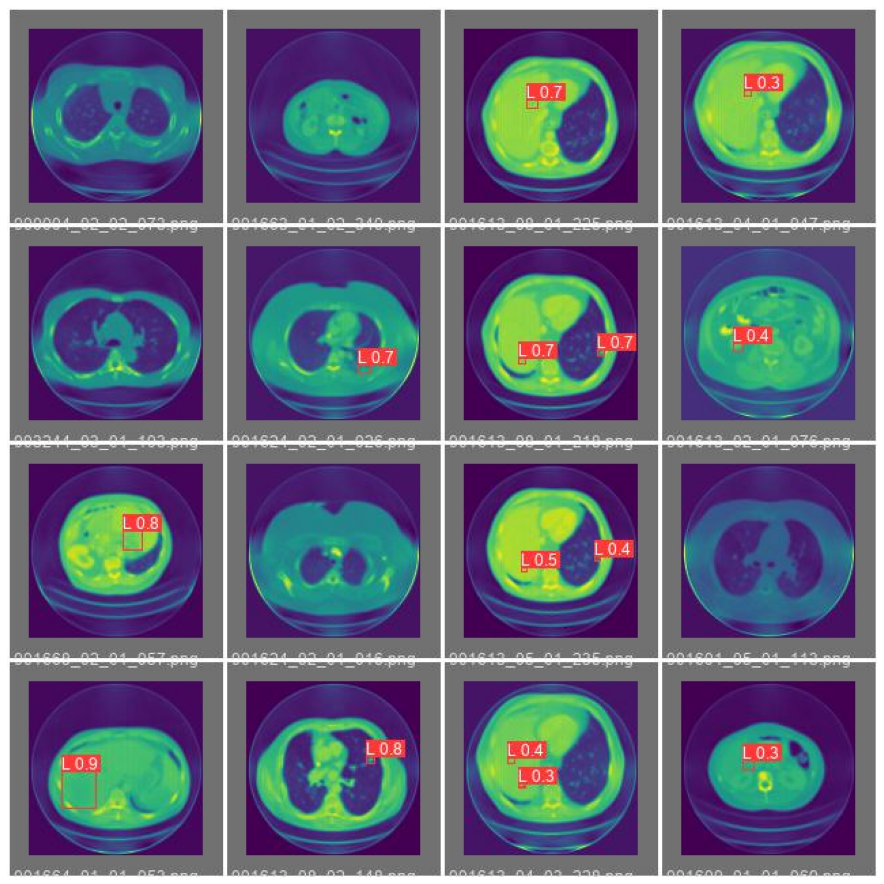

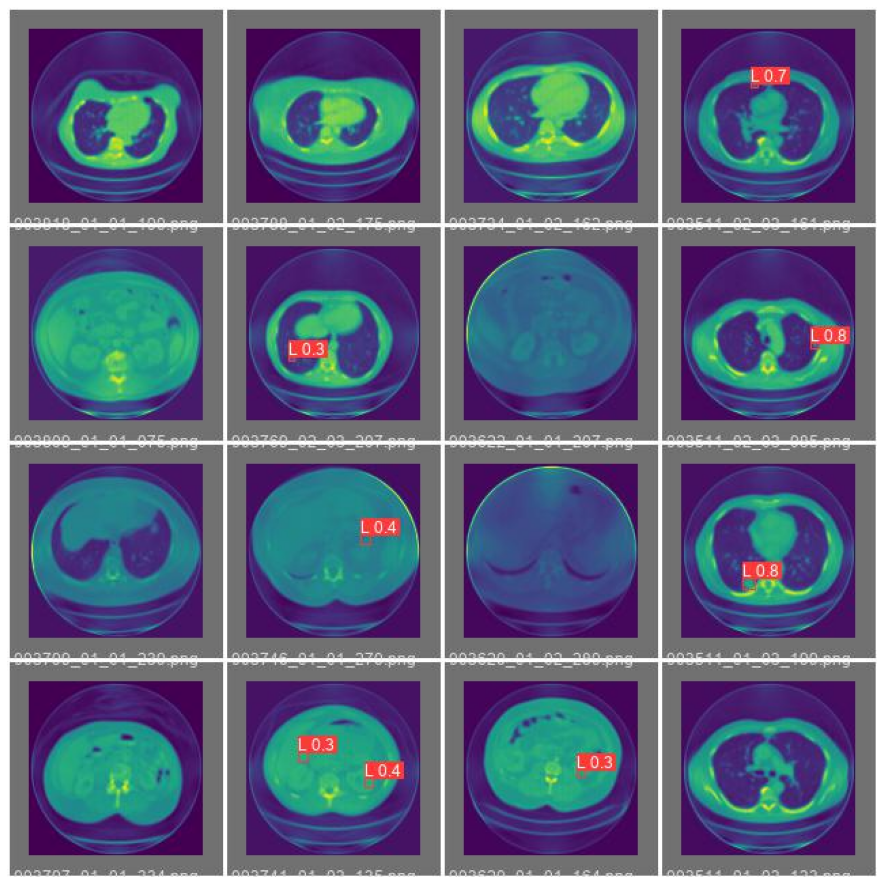

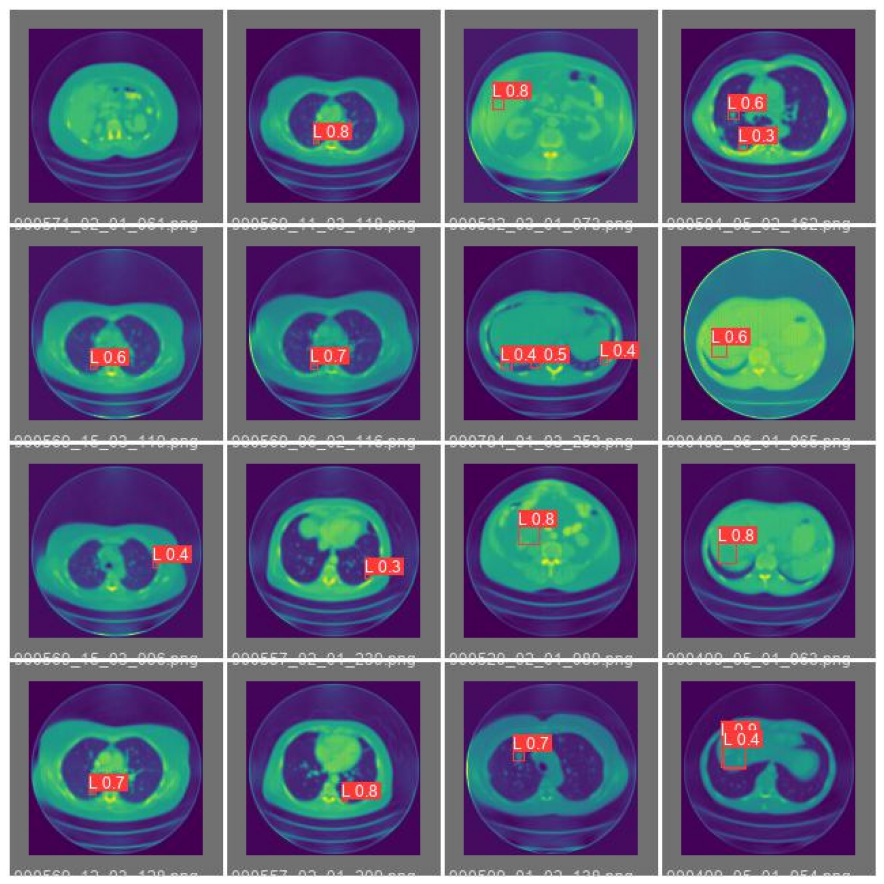

In [5]:
show_valid_results("exp14")

Visualizing for 64 Slices

['runs/train/exp15/val_batch0_pred.jpg', 'runs/train/exp15/val_batch1_pred.jpg', 'runs/train/exp15/val_batch2_pred.jpg']


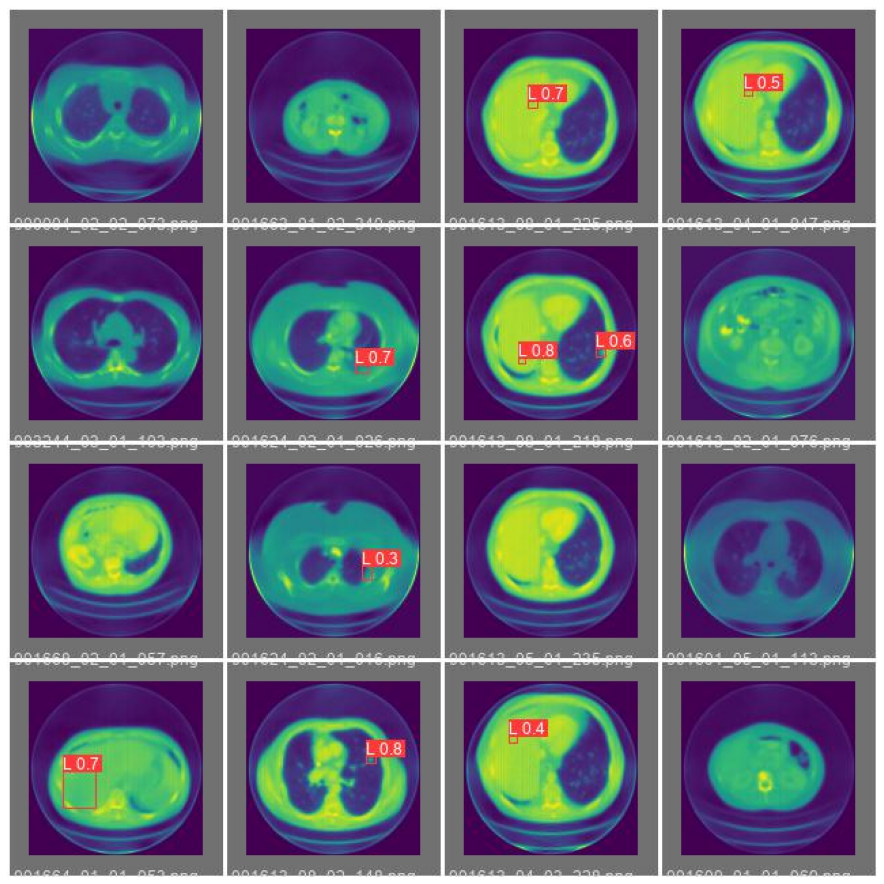

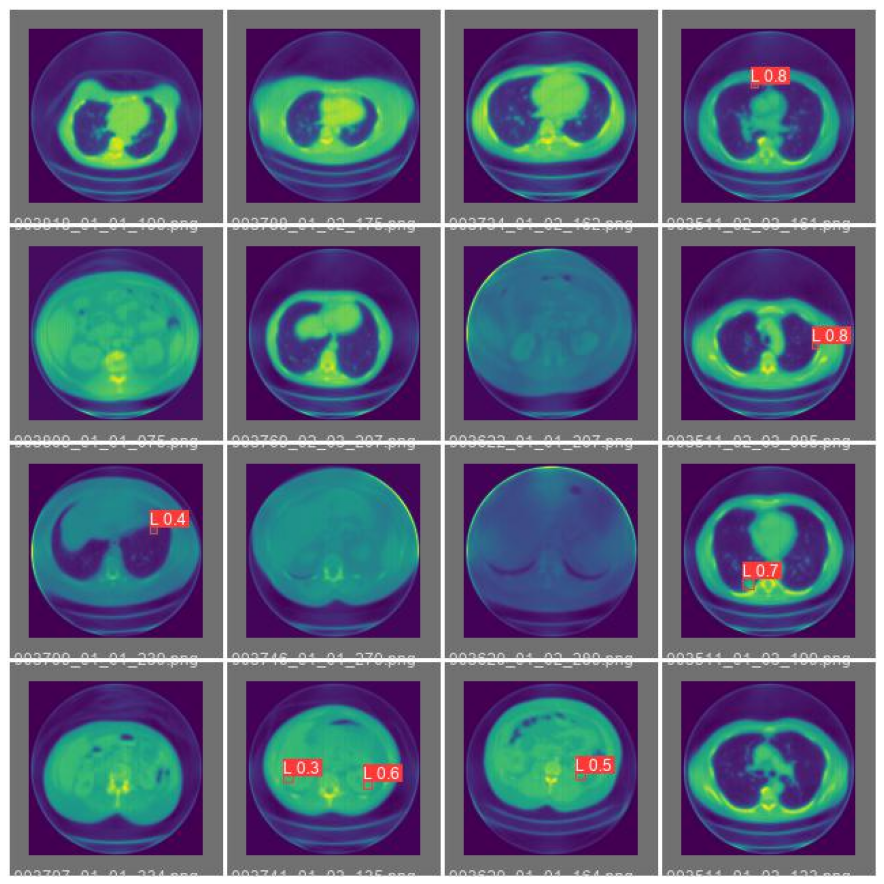

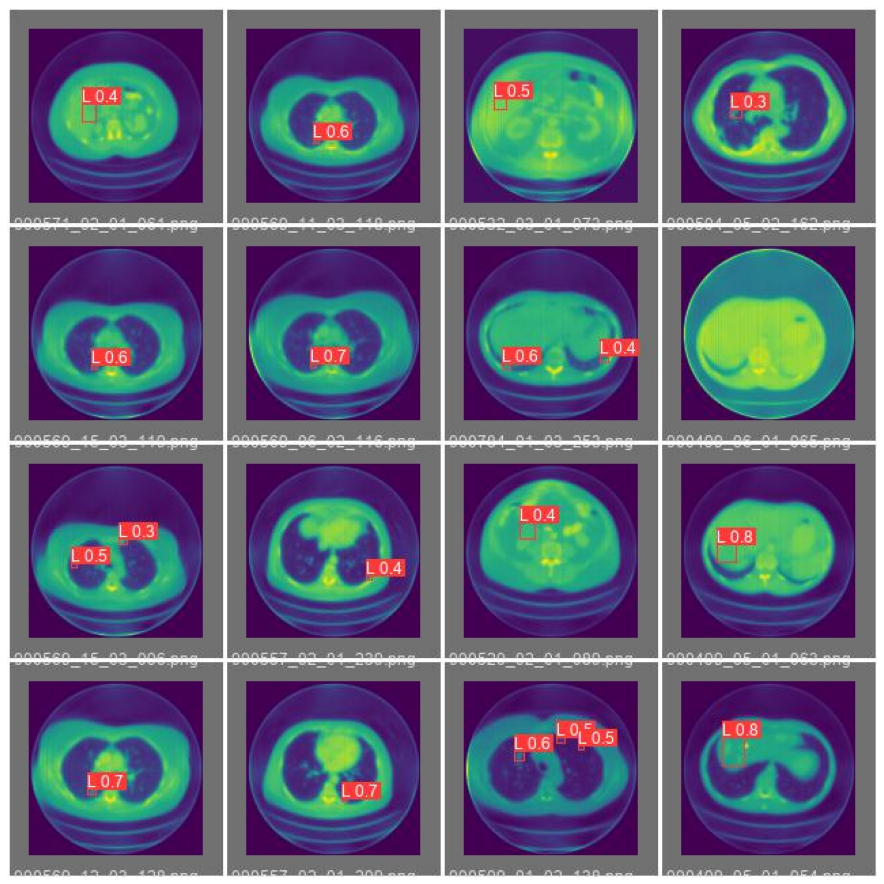

In [6]:
show_valid_results("exp15")

Visualizing for 128 Slices

['runs/train/exp17/val_batch0_pred.jpg', 'runs/train/exp17/val_batch1_pred.jpg', 'runs/train/exp17/val_batch2_pred.jpg']


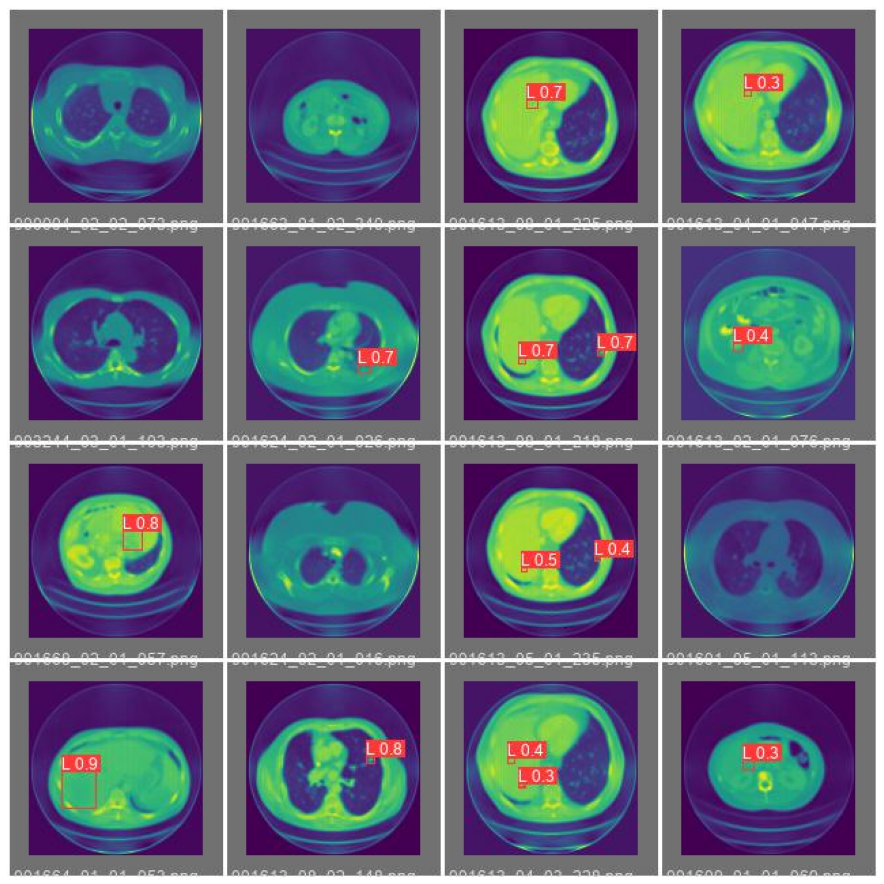

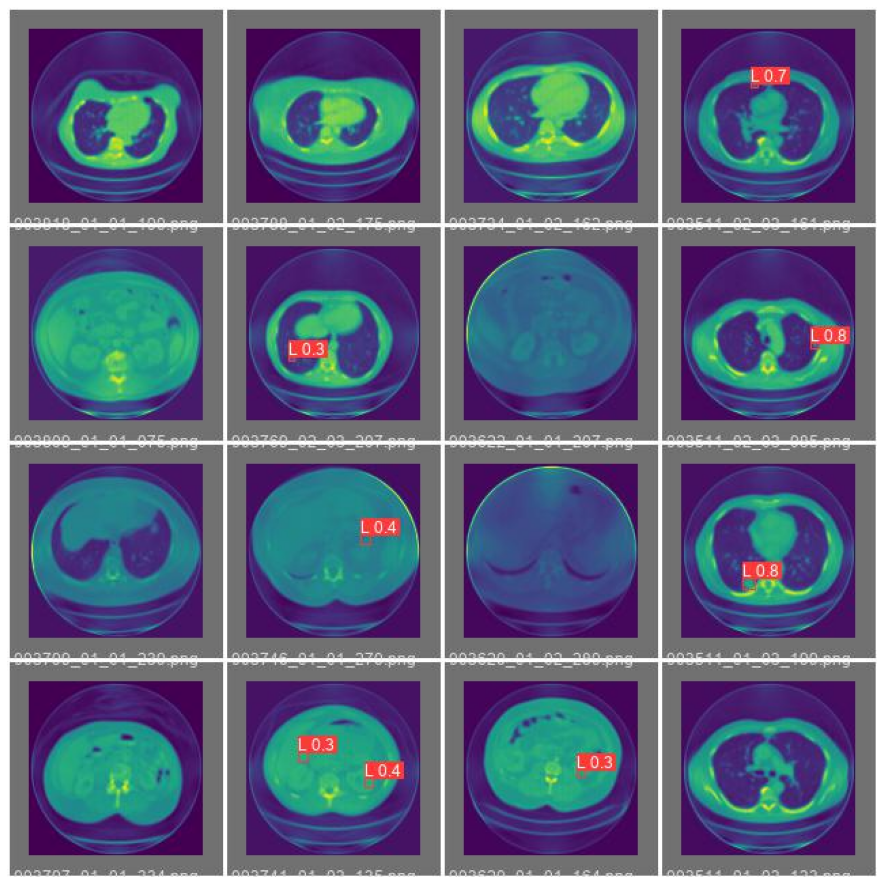

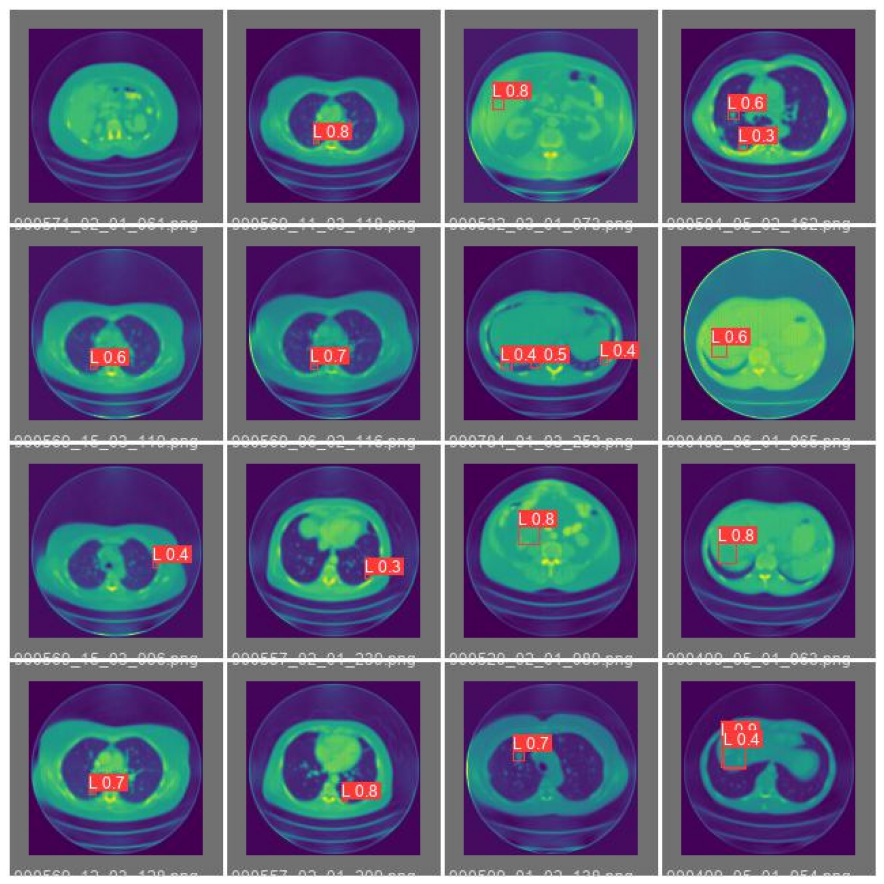

In [7]:
show_valid_results("exp17")